In [47]:
import numpy as np
import pandas as pd
import ChartDrawer
from ChartDrawer import MultiLineChart

# Intra-similarity analysis

In [48]:
intra_similarities = pd.read_csv("data/similarity/univ2_intra_similarities.csv")
one_scammer_intra_similarities = pd.read_csv("data/similarity/univ2_one_scammer_group_intra_similarities.csv")
total = pd.concat([intra_similarities, one_scammer_intra_similarities], axis=0)


def create_bins(start=0, end=100, num=5):
    bins = []
    step = int((end - start) / num)
    for idx in range(start, end, step):
        bins.append((idx, idx + step))
    return bins


def count_bins(x, bins):
    counts = [0] * len(bins)
    for v in x:
        if v == 0:
            counts[0] += 1
        else:
            for i in range(len(bins)):
                b = bins[i]
                if b[0] < v <= b[1]:
                    counts[i] += 1
    return counts


def to_percentage(x):
    sum = np.sum(x)
    return x / sum * 100


def bins_to_labels(bins):
    return [b[1] for b in bins]


def lines_with_lower_bound_build(df, title, x_label, y_label, chain="ETH", legend_pos = 'upper left'):
    Ys = []
    labels = []
    bins = create_bins(num=50)
    x = bins_to_labels(bins)
    for gs in [1, 10, 50, 100]:
        labels.append(f">={gs}")
        filtered_df = df[df.scammers >= gs]
        display(filtered_df.intra_similarity.describe())
        y = list(filtered_df.intra_similarity.values * 100)
        y = count_bins(y, bins)
        print(f"Group size {gs}", y)
        y = to_percentage(y)
        print(f"Group size {gs} (%)", y)
        Ys.append(y)
    return MultiLineChart(x, Ys, labels, title, x_label, y_label, "Group size", MultiLineChart.color_set[chain], legend_pos)


def hist_chart_with_lower_bound(df):
    Xs = []
    for gs in [1, 10, 50, 100]:
        filtered_df = df[df["scammers"] >= gs]
        display(filtered_df.intra_similarity.describe())
        x = list(filtered_df.intra_similarity.values)
        Xs.append(x)
    ChartDrawer.hist(Xs, 50, f"Similarity distribution by group sizes", "Intra-similarity", "Number of groups")

In [49]:
filter_df = total[total.scammers >= 100]
x = filter_df.intra_similarity.values * 100
bins = create_bins()
result = count_bins(x, bins)
result

[0, 4, 6, 4, 7]

In [50]:
print(len(x))
print(np.sum(result))
len(x) == np.sum(result)

21
21


True

In [51]:
to_percentage(result)

array([ 0.        , 19.04761905, 28.57142857, 19.04761905, 33.33333333])

count    16374.000000
mean         0.748419
std          0.265113
min          0.000000
25%          0.567844
50%          0.826087
75%          1.000000
max          1.000000
Name: intra_similarity, dtype: float64

Group size 1 [3, 5, 6, 68, 125, 94, 125, 85, 93, 103, 146, 159, 157, 184, 154, 191, 214, 186, 190, 180, 158, 243, 221, 168, 184, 189, 177, 213, 157, 180, 184, 190, 167, 186, 252, 222, 276, 344, 522, 657, 455, 1131, 491, 300, 365, 394, 287, 283, 238, 5072]
Group size 1 (%) [1.83217296e-02 3.05362160e-02 3.66434591e-02 4.15292537e-01
 7.63405399e-01 5.74080860e-01 7.63405399e-01 5.19115671e-01
 5.67973617e-01 6.29046049e-01 8.91657506e-01 9.71051667e-01
 9.58837181e-01 1.12373275e+00 9.40515451e-01 1.16648345e+00
 1.30695004e+00 1.13594723e+00 1.16037621e+00 1.09930377e+00
 9.64944424e-01 1.48406010e+00 1.34970075e+00 1.02601686e+00
 1.12373275e+00 1.15426896e+00 1.08098204e+00 1.30084280e+00
 9.58837181e-01 1.09930377e+00 1.12373275e+00 1.16037621e+00
 1.01990961e+00 1.13594723e+00 1.53902528e+00 1.35580799e+00
 1.68559912e+00 2.10089166e+00 3.18798095e+00 4.01245878e+00
 2.77879565e+00 6.90729205e+00 2.99865641e+00 1.83217296e+00
 2.22914376e+00 2.40625382e+00 1.75277880e+00 1.72834982

count    521.000000
mean       0.733449
std        0.228411
min        0.204692
25%        0.539958
50%        0.739942
75%        0.978610
max        1.000000
Name: intra_similarity, dtype: float64

Group size 10 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 2, 6, 7, 5, 11, 12, 9, 10, 15, 14, 12, 14, 11, 18, 14, 14, 15, 14, 13, 8, 14, 11, 9, 4, 14, 9, 6, 13, 5, 5, 12, 14, 14, 14, 23, 127]
Group size 10 (%) [ 0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.19193858  0.19193858
  0.          0.19193858  0.38387716  1.15163148  1.34357006  0.9596929
  2.11132438  2.30326296  1.72744722  1.9193858   2.87907869  2.68714012
  2.30326296  2.68714012  2.11132438  3.45489443  2.68714012  2.68714012
  2.87907869  2.68714012  2.49520154  1.53550864  2.68714012  2.11132438
  1.72744722  0.76775432  2.68714012  1.72744722  1.15163148  2.49520154
  0.9596929   0.9596929   2.30326296  2.68714012  2.68714012  2.68714012
  4.41458733 24.37619962]


count    71.000000
mean      0.717238
std       0.232319
min       0.298265
25%       0.531538
50%       0.657231
75%       0.976035
max       1.000000
Name: intra_similarity, dtype: float64

Group size 50 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 2, 3, 2, 1, 0, 1, 3, 2, 2, 2, 1, 3, 4, 4, 4, 1, 0, 2, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 3, 3, 6, 15]
Group size 50 (%) [ 0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          1.4084507   0.          1.4084507   1.4084507
  2.81690141  4.22535211  2.81690141  1.4084507   0.          1.4084507
  4.22535211  2.81690141  2.81690141  2.81690141  1.4084507   4.22535211
  5.63380282  5.63380282  5.63380282  1.4084507   0.          2.81690141
  1.4084507   0.          1.4084507   0.          0.          1.4084507
  0.          0.          0.          1.4084507   4.22535211  4.22535211
  8.45070423 21.12676056]


count    21.000000
mean      0.662904
std       0.256699
min       0.298265
25%       0.427184
50%       0.600000
75%       0.976190
max       1.000000
Name: intra_similarity, dtype: float64

Group size 100 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 2, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 2, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 4]
Group size 100 (%) [ 0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          4.76190476  0.          0.          0.
  9.52380952  4.76190476  4.76190476  4.76190476  0.          0.
  4.76190476  0.          4.76190476  4.76190476  0.          4.76190476
  4.76190476  9.52380952  0.          0.          0.          4.76190476
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
 14.28571429 19.04761905]


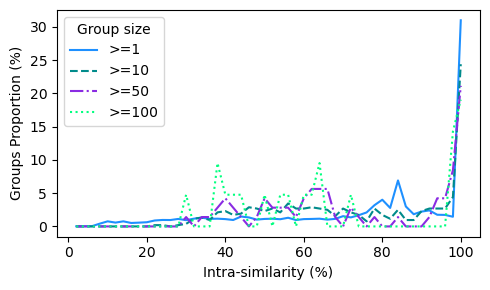

In [52]:
setting_1 = lines_with_lower_bound_build(total,"","Intra-similarity (%)", "Groups Proportion (%)", "ETH")
ChartDrawer.multi_lines("img/intra_uni.png",setting_1)


In [53]:
intra_similarities = pd.read_csv("data/similarity/panv2_intra_similarities.csv")
one_scammer_intra_similarities = pd.read_csv("data/similarity/panv2_one_scammer_group_intra_similarities.csv")
total = pd.concat([intra_similarities, one_scammer_intra_similarities], axis=0)

count    4027.000000
mean        0.738887
std         0.271408
min         0.026667
25%         0.524006
50%         0.828571
75%         1.000000
max         1.000000
Name: intra_similarity, dtype: float64

Group size 1 [0, 2, 7, 14, 16, 20, 39, 27, 29, 31, 47, 42, 41, 38, 54, 46, 40, 56, 49, 50, 52, 60, 67, 53, 56, 66, 46, 47, 53, 44, 39, 38, 41, 42, 51, 57, 65, 60, 73, 94, 101, 267, 130, 81, 134, 151, 86, 82, 71, 1172]
Group size 1 (%) [ 0.          0.04966476  0.17382667  0.34765334  0.3973181   0.49664763
  0.96846288  0.6704743   0.72013906  0.76980382  1.16712193  1.04296002
  1.01812764  0.94363049  1.3409486   1.14228955  0.99329526  1.39061336
  1.21678669  1.24161907  1.29128383  1.48994289  1.66376956  1.31611622
  1.39061336  1.63893717  1.14228955  1.16712193  1.31611622  1.09262478
  0.96846288  0.94363049  1.01812764  1.04296002  1.26645145  1.41544574
  1.61410479  1.48994289  1.81276384  2.33424385  2.50807052  6.63024584
  3.22820959  2.0114229   3.32753911  3.7496896   2.1355848   2.03625528
  1.76309908 29.10355103]


count    40.000000
mean      0.499815
std       0.260287
min       0.146068
25%       0.289947
50%       0.426132
75%       0.679122
max       1.000000
Name: intra_similarity, dtype: float64

Group size 10 [0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 1, 1, 1, 5, 3, 1, 1, 1, 0, 2, 0, 1, 1, 1, 1, 0, 1, 2, 0, 1, 0, 0, 2, 1, 0, 0, 0, 1, 0, 1, 2, 0, 0, 1, 0, 1, 0, 0, 3]
Group size 10 (%) [ 0.   0.   0.   0.   0.   0.   0.   5.   0.   5.   0.   2.5  2.5  2.5
 12.5  7.5  2.5  2.5  2.5  0.   5.   0.   2.5  2.5  2.5  2.5  0.   2.5
  5.   0.   2.5  0.   0.   5.   2.5  0.   0.   0.   2.5  0.   2.5  5.
  0.   0.   2.5  0.   2.5  0.   0.   7.5]


count    3.000000
mean     0.278084
std      0.121961
min      0.159765
25%      0.215432
50%      0.271099
75%      0.337244
max      0.403388
Name: intra_similarity, dtype: float64

Group size 50 [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Group size 50 (%) [ 0.          0.          0.          0.          0.          0.
  0.         33.33333333  0.          0.          0.          0.
  0.         33.33333333  0.          0.          0.          0.
  0.          0.         33.33333333  0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.        ]


count    2.000000
mean     0.215432
std      0.078725
min      0.159765
25%      0.187599
50%      0.215432
75%      0.243266
max      0.271099
Name: intra_similarity, dtype: float64

Group size 100 [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Group size 100 (%) [ 0.  0.  0.  0.  0.  0.  0. 50.  0.  0.  0.  0.  0. 50.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]


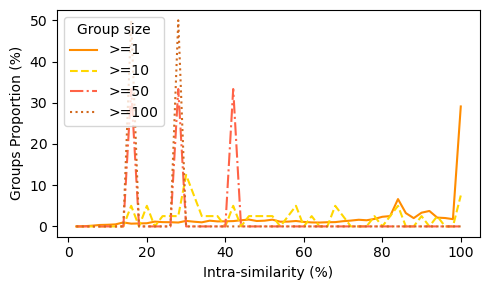

In [54]:
setting_1 = lines_with_lower_bound_build(total,"","Intra-similarity (%)", "Groups Proportion (%)", "BNB")
ChartDrawer.multi_lines("img/intra_pan.png", setting_1)

# INTER SIMILARITY

count    74254.000000
mean         0.274613
std          0.068698
min          0.011937
25%          0.213926
50%          0.286301
75%          0.336296
max          0.390249
Name: intra_similarity, dtype: float64

Group size 1 [5, 23, 24, 3, 61, 363, 572, 1494, 5090, 7066, 6035, 5429, 4720, 4255, 6579, 6954, 8636, 9769, 7131, 45, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Group size 1 (%) [6.73364398e-03 3.09747623e-02 3.23214911e-02 4.04018639e-03
 8.21504565e-02 4.88862553e-01 7.70328871e-01 2.01201282e+00
 6.85484957e+00 9.51598567e+00 8.12750828e+00 7.31139063e+00
 6.35655992e+00 5.73033103e+00 8.86012875e+00 9.36515205e+00
 1.16303499e+01 1.31561936e+01 9.60352304e+00 6.06027958e-02
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00]


count    530.000000
mean       0.219741
std        0.062774
min        0.107894
25%        0.174517
50%        0.198739
75%        0.268996
max        0.375602
Name: intra_similarity, dtype: float64

Group size 10 [0, 0, 0, 0, 0, 2, 16, 51, 96, 106, 78, 33, 11, 20, 34, 25, 19, 33, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Group size 10 (%) [ 0.          0.          0.          0.          0.          0.37735849
  3.01886792  9.62264151 18.11320755 20.         14.71698113  6.22641509
  2.0754717   3.77358491  6.41509434  4.71698113  3.58490566  6.22641509
  1.13207547  0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.        ]


count    72.000000
mean      0.202072
std       0.046111
min       0.134569
25%       0.172378
50%       0.195744
75%       0.215371
max       0.356767
Name: intra_similarity, dtype: float64

Group size 50 [0, 0, 0, 0, 0, 0, 3, 8, 14, 15, 15, 8, 1, 2, 2, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Group size 50 (%) [ 0.          0.          0.          0.          0.          0.
  4.16666667 11.11111111 19.44444444 20.83333333 20.83333333 11.11111111
  1.38888889  2.77777778  2.77777778  2.77777778  0.          2.77777778
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.        ]


count    21.000000
mean      0.201787
std       0.036922
min       0.137617
25%       0.178958
50%       0.196380
75%       0.210295
max       0.302191
Name: intra_similarity, dtype: float64

Group size 100 [0, 0, 0, 0, 0, 0, 1, 0, 5, 7, 4, 2, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Group size 100 (%) [ 0.          0.          0.          0.          0.          0.
  4.76190476  0.         23.80952381 33.33333333 19.04761905  9.52380952
  0.          4.76190476  0.          4.76190476  0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.        ]


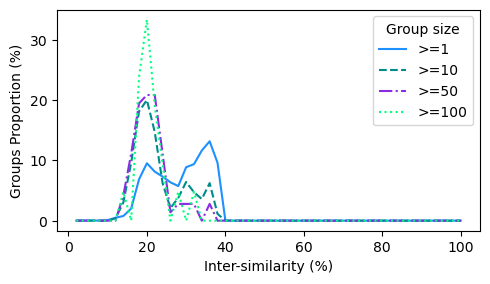

In [55]:
inter_similarities = pd.read_csv("data/similarity/univ2_inter_similarities.csv")
setting_1 = lines_with_lower_bound_build(inter_similarities,"", "Inter-similarity (%)", "Groups Proportion (%)", "ETH", "upper right")
ChartDrawer.multi_lines("img/inter_uni.png",setting_1)

count    9610.000000
mean        0.212227
std         0.045962
min         0.014191
25%         0.176744
50%         0.223448
75%         0.247683
max         0.295722
Name: intra_similarity, dtype: float64

Group size 1 [17, 6, 6, 13, 32, 148, 488, 879, 947, 978, 1008, 1853, 2115, 800, 320, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Group size 1 (%) [ 0.17689906  0.06243496  0.06243496  0.13527575  0.33298647  1.54006243
  5.0780437   9.14672216  9.85431842 10.17689906 10.48907388 19.28199792
 22.00832466  8.32466181  3.32986472  0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.        ]


count    36.000000
mean      0.205707
std       0.037524
min       0.109809
25%       0.183534
50%       0.212968
75%       0.234362
max       0.254450
Name: intra_similarity, dtype: float64

Group size 10 [0, 0, 0, 0, 0, 1, 2, 2, 2, 7, 6, 10, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Group size 10 (%) [ 0.          0.          0.          0.          0.          2.77777778
  5.55555556  5.55555556  5.55555556 19.44444444 16.66666667 27.77777778
 16.66666667  0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.        ]


count    2.000000
mean     0.172129
std      0.062806
min      0.127719
25%      0.149924
50%      0.172129
75%      0.194335
max      0.216540
Name: intra_similarity, dtype: float64

Group size 50 [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Group size 50 (%) [ 0.  0.  0.  0.  0.  0. 50.  0.  0.  0. 50.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]


count    1.00000
mean     0.21654
std          NaN
min      0.21654
25%      0.21654
50%      0.21654
75%      0.21654
max      0.21654
Name: intra_similarity, dtype: float64

Group size 100 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Group size 100 (%) [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0. 100.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.]


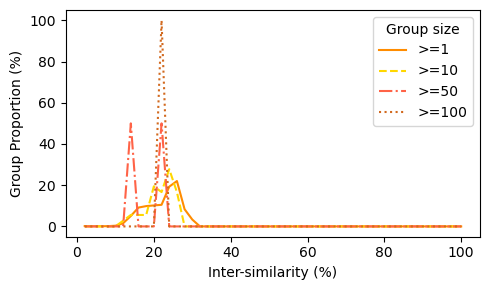

In [56]:
inter_similarities = pd.read_csv("data/similarity/panv2_inter_similarities.csv")
setting_1 = lines_with_lower_bound_build(inter_similarities,"","Inter-similarity (%)", "Group Proportion (%)", "BNB", "upper right")
ChartDrawer.multi_lines("img/inter_pan.png",setting_1)

Group size 20 [4.66309163e-02 1.16577291e+00 1.77197482e+00 1.42224295e+00
 2.37817673e+00 2.07507578e+00 2.33154581e+00 1.51550478e+00
 1.49218932e+00 1.79529028e+00 1.23571928e+00 2.09839123e+00
 1.84192119e+00 2.19165307e+00 2.26159944e+00 5.52576358e+00
 6.41175099e+00 4.68640709e+00 5.22266263e+00 5.25297272e+01]


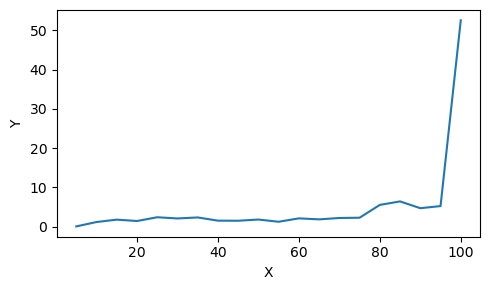

In [57]:
bins = create_bins(num=20)
x = bins_to_labels(bins)
idv_similarities = pd.read_csv("data/similarity/univ2_individual_similarities.csv")
y = list(idv_similarities.intra_similarity.values * 100)
y = count_bins(y, bins)
y = to_percentage(y)
print(f"Group size {len(y)}", y)
setting = MultiLineChart(x, [y], [""], "", "X", "Y")
ChartDrawer.multi_lines("img/idv_uni.png", setting)

Group size 20 [ 0.14577259  0.94752187  1.82215743  2.55102041  3.27988338  2.7696793
  2.18658892  2.55102041  2.40524781  3.06122449  2.33236152  1.60349854
  2.11370262  2.47813411  3.86297376  4.73760933  9.54810496 10.64139942
  7.28862974 33.67346939]


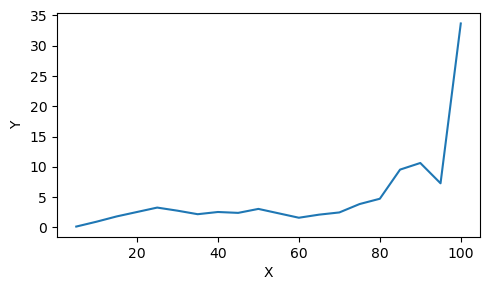

In [58]:
bins = create_bins(num=20)
x = bins_to_labels(bins)
idv_similarities = pd.read_csv("data/similarity/panv2_individual_similarities.csv")
y = list(idv_similarities.intra_similarity.values * 100)
y = count_bins(y, bins)
y = to_percentage(y)
print(f"Group size {len(y)}", y)
setting = MultiLineChart(x, [y], [""], "", "X", "Y")
ChartDrawer.multi_lines("img/idv_pan.png", setting)